# CIL exercise sheet 3, PCA for Image Analysis

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
# pip3 install Pillow
import os,sys
from PIL import Image
import os

In [5]:
# Load data

image_dir = "CroppedYale/"

files = os.listdir(image_dir)
n = len(files)
print("Loading " + str(n) + " images")

imgs = [Image.open(image_dir + files[i]) for i in range(n)]

Loading 38 images


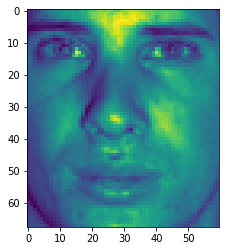

In [6]:
plt.imshow(imgs[1]) # Display first image

Data preperation

In [31]:
# Assume all images have the same size
img0 = imgs[0]
width, height = img0.size
wh = width*height

print(width)
print(height)
# Compute input matrix X
X_list = [np.reshape(imgs[i].getdata(), (wh)) for i in range(n)]
X = np.array(X_list)
print(X.shape)

#X_list is a list of arrays of dimension (4080,), since this is wh
print(X_list[0].shape)


60
68
(38, 4080)
(4080,)


[53.39473684 59.44736842 63.71052632 ... 77.23684211 69.5
 62.18421053]
(4080,)


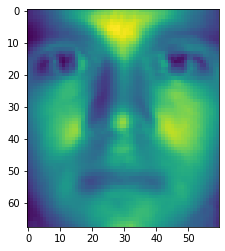

In [32]:
#compute the mean image
#note that an image is thus an array of size (4080,), so we need to compute
#the mean of the 38 images that we have
x_mean = np.mean(X, axis=0)
print(x_mean)
print(x_mean.shape)

#reshape and visualize the mean image
x_mean_2d = np.reshape(x_mean, (height,width))
plt.imshow(x_mean_2d)

In [ ]:
#create a "mean matrix"
X_mean_list = [x_mean for i in range(n)]
X_mean = np.array(X_mean_list)
print(X_mean.shape)

In [71]:
# Subtract the mean image from input matrix X
X = X - X_mean

In [29]:
np.shape(mX)

(38, 4080)

Perform PCA on the covariance matrix

(4080, 4080)


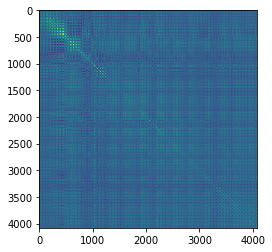

In [72]:
#compute the covariance matrix
covM = (1/n)*np.matmul(np.transpose(X), X)
print(covM.shape)
plt.imshow(covM)

In [44]:
#perform SVD on the covariance matrix

U, SIGMA, V = np.linalg.svd(covM, full_matrices=True)

In [45]:
print(U.shape)
print(SIGMA.shape)
print(V.shape)

(4080, 4080)
(4080,)
(4080, 4080)


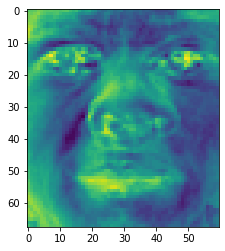

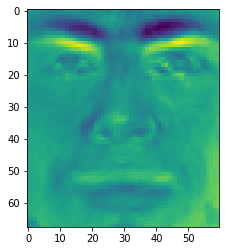

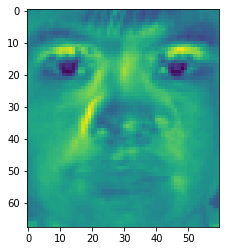

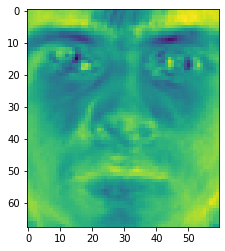

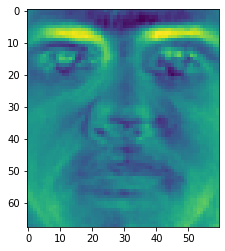

In [46]:
#visualize the first 5 eigenfaces
#these eigenfaces are represented by the first 5 eigenvectors
#which are columns of the matrix U

k=5
list_eigenfaces = [np.reshape(U[:,i],(height,width)) for i in range(k)]
eigenfaces = np.reshape(np.asarray(list_eigenfaces),(k*height,width))

for i in range(k):
    plt.imshow((list_eigenfaces[i]))
    plt.show()

In [73]:
#As we want to have the first 5 principal components
#We truncate U to U_k consisting of the first 5 columns of U
U_k = U[:,:k]
U_k.shape

(4080, 5)

In [74]:
#performing the PCA compression
Z = np.matmul(np.transpose(U_k),np.transpose(X))

In [75]:
Z.shape

(5, 38)

In [76]:
#Now we convert the image back to the original basis again
#and we add back the mean we subtracted before

X_low = np.matmul(U_k, Z).T + X_mean

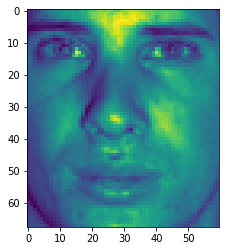

In [78]:
#Plot the original image to compare it to the decompressed
#one later
img_idx = 1

ourface = np.reshape(X[img_idx,:] + x_mean, (height,width))
plt.imshow(ourface)



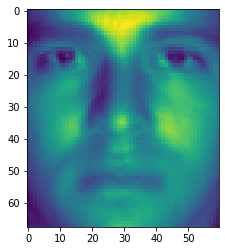

In [79]:
#plot the decompressed image
ourface_decom = np.reshape(X_low[img_idx,:] + x_mean, (height,width))
plt.imshow(ourface_decom)

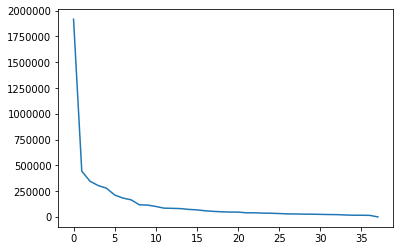

In [80]:
#look at the eigenvalue spectrum
plt.plot(SIGMA[:X.shape[0]])